Libraries

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [191]:
#read Data
car_data=pd.read_csv('cars_9z7my.csv')
car_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [193]:
#Data Analysys
car_data.shape


(261, 8)

In [79]:
#Checking for any null values
car_data.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [81]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB


In [83]:
print(car_data.describe(include=[object]))

       brand
count    261
unique     3
top      US.
freq     162


In [85]:
 #Using labelencoder to encode the target variable
lb=LabelEncoder()
print(lb)
car_data['brand']=lb.fit_transform(car_data['brand'])
print(car_data)

LabelEncoder()
      mpg  cylinders  cubicinches   hp  weightlbs  time-to-60  year  brand
0    14.0          8          350  165       4209          12  1972      2
1    31.9          4           89   71       1925          14  1980      0
2    17.0          8          302  140       3449          11  1971      2
3    15.0          8          400  150       3761          10  1971      2
4    30.5          4           98   63       2051          17  1978      2
..    ...        ...          ...  ...        ...         ...   ...    ...
256  17.0          8          305  130       3840          15  1980      2
257  36.1          4           91   60       1800          16  1979      1
258  22.0          6          232  112       2835          15  1983      2
259  18.0          6          232  100       3288          16  1972      2
260  22.0          6          250  105       3353          15  1977      2

[261 rows x 8 columns]


In [87]:
#Divide the dataset into independent and dependent variables
X=car_data.drop('brand',axis=1)
y=car_data['brand']

In [50]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20 percent of data will be used for testing purpose

In [162]:
dt_car=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=5,max_depth=2)
dt_car.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=5)

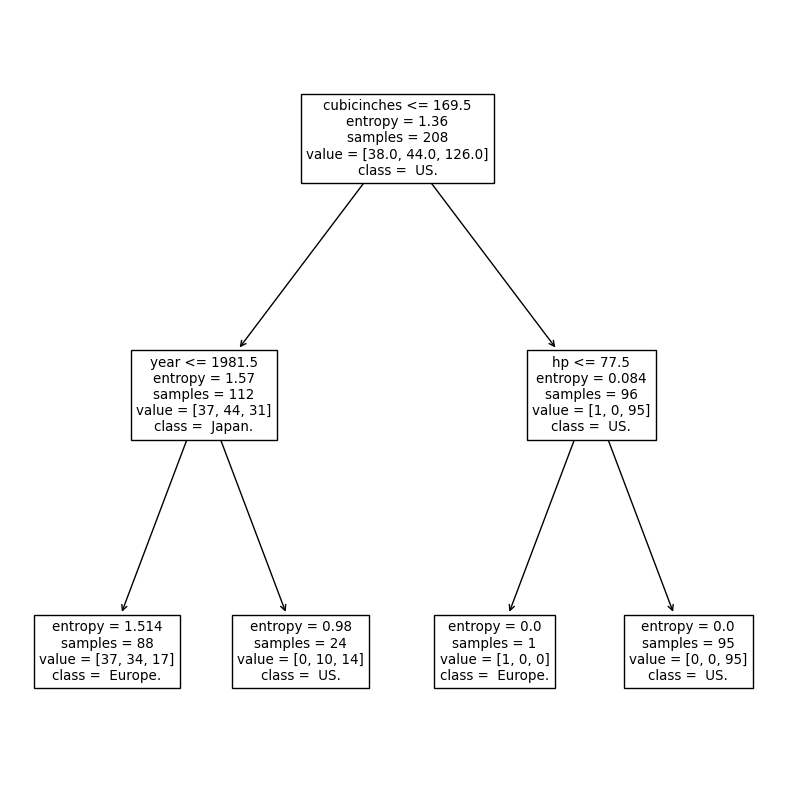

In [164]:
#plot tree can also be used for visualising the tree
plt.figure(figsize=(10,10))
plot_tree(dt_car,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [166]:
pred = dt_car.predict(X_train) #Training data
print('Test Accuracy is:',accuracy_score(y_train,pred)*100)

Test Accuracy is: 70.67307692307693


In [168]:
#Calculating accuracy
pred = dt_car.predict(X_test) #Unknown
print('Test Accuracy is:',accuracy_score(y_test,pred)*100)

Test Accuracy is: 73.58490566037736


In [170]:
dt_car.feature_importances_

array([0.        , 0.        , 0.78473418, 0.06356017, 0.        ,
       0.        , 0.15170565])

In [172]:
'''
- Selecting only the important features
'''
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(dt_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

In [174]:
print(car_data.corr())

                  mpg  cylinders  cubicinches        hp  weightlbs  \
mpg          1.000000  -0.776710    -0.802686 -0.774905  -0.821269   
cylinders   -0.776710   1.000000     0.951350  0.845155   0.891426   
cubicinches -0.802686   0.951350     1.000000  0.905721   0.924603   
hp          -0.774905   0.845155     0.905721  1.000000   0.857974   
weightlbs   -0.821269   0.891426     0.924603  0.857974   1.000000   
time-to-60   0.509070  -0.578161    -0.609733 -0.744873  -0.476138   
year         0.550441  -0.322239    -0.348755 -0.383869  -0.260467   
brand       -0.488253   0.598536     0.621733  0.473514   0.543646   

             time-to-60      year     brand  
mpg            0.509070  0.550441 -0.488253  
cylinders     -0.578161 -0.322239  0.598536  
cubicinches   -0.609733 -0.348755  0.621733  
hp            -0.744873 -0.383869  0.473514  
weightlbs     -0.476138 -0.260467  0.543646  
time-to-60     1.000000  0.312311 -0.335770  
year           0.312311  1.000000 -0.032961  
b

In [176]:
features

,Features,Importance
2,cubicinches,0.785
6,year,0.152
3,hp,0.064
0,mpg,0.000
1,cylinders,0.000
4,weightlbs,0.000
5,time-to-60,0.000


In [186]:
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.43      0.58        21
           1       0.00      0.00      0.00         0
           2       0.83      0.94      0.88        32

    accuracy                           0.74        53
   macro avg       0.58      0.46      0.49        53
weighted avg       0.86      0.74      0.76        53



C:\Users\Sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sumit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [195]:
#Training
rf_car=RandomForestClassifier(n_estimators=100, criterion='entropy',max_depth=3)
rf_car.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [197]:
#Calculating accuracy
pred = rf_car.predict(X_test)
print('Test Accuracy is:',accuracy_score(y_test,pred))

Test Accuracy is: 0.8113207547169812


In [199]:
pred = dt_car.predict(X_train) #Training data
print('Test Accuracy is:',accuracy_score(y_train,pred)*100)

Test Accuracy is: 70.67307692307693


In [201]:
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(rf_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
print(features)

      Features  Importance
2  cubicinches       0.339
4    weightlbs       0.175
0          mpg       0.145
1    cylinders       0.136
3           hp       0.114
5   time-to-60       0.053
6         year       0.038


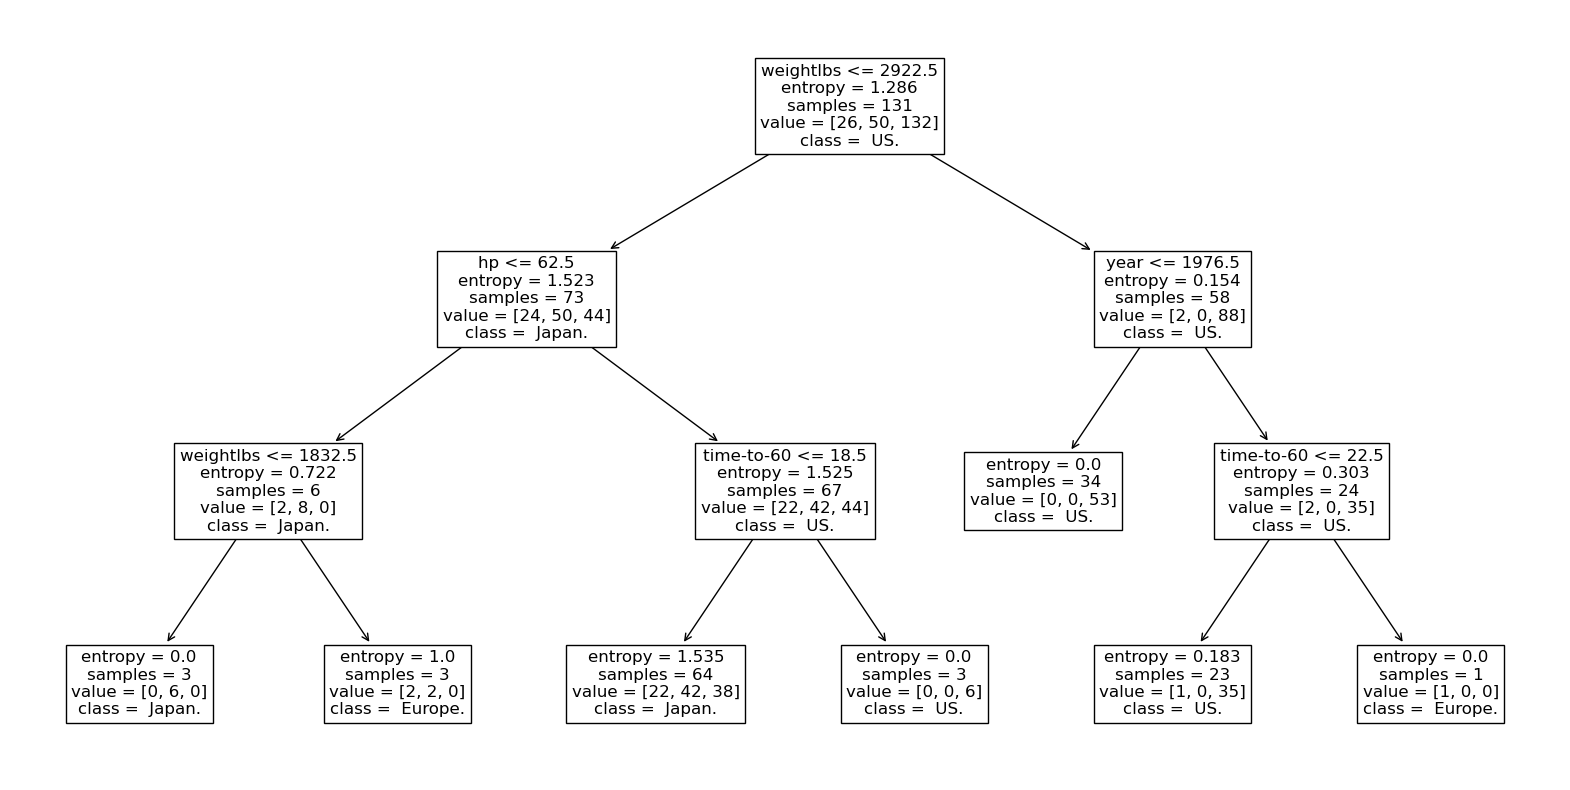

In [203]:
#Visualing a single estimator
plt.figure(figsize=(20,10))
plot_tree(rf_car.estimators_[5],feature_names=X_train.columns,class_names=list(lb.classes_),fontsize=12)
plt.show()